## Model Development: Laptop Pricing

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(file_path, header=0)

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,234,234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,235,235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,236,236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


### Tak 1: Single Linear Regression

#### Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [4]:
lm = LinearRegression()
lm.fit(df[["CPU_frequency"]], df[["Price"]])

LinearRegression()

In [5]:
lm.coef_

array([[1485.19362648]])

In [6]:
lm.intercept_

array([253.66117069])

(0.0, 3974.15)

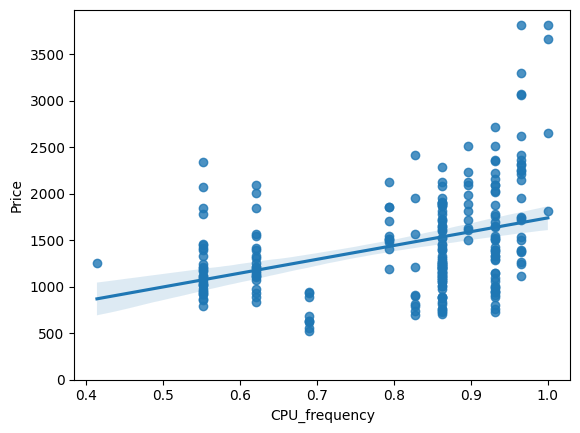

In [7]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

In [8]:
df[["CPU_frequency", "Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


#### Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

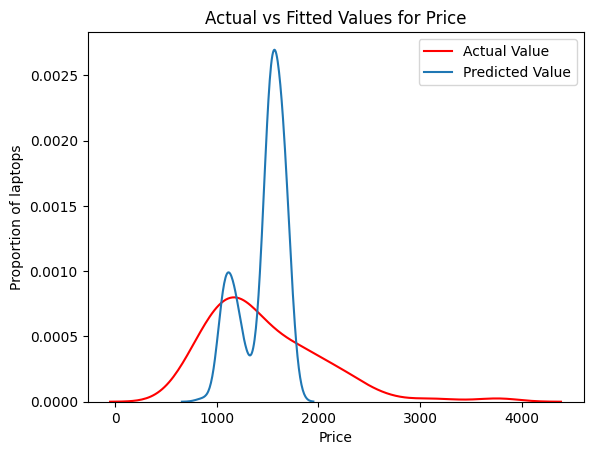

In [9]:
Yhat=lm.predict(df[['CPU_frequency']])

ax1 = sns.kdeplot(df['Price'], color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.kdeplot(Yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

#### Evaluate the Mean Squared Error and R^2 score values for the model.

In [10]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(df[["CPU_frequency"]], df[["Price"]])
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


### Task 2 - Multiple Linear Regression

The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [11]:
lm1 = LinearRegression()
Z = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS", "GPU", "Category"]]
Y =df[["Price"]]
lm1.fit(Z, Y)
Yhat = lm1.predict(Z)

Plot the Distribution graph of the predicted values as well as the Actual values

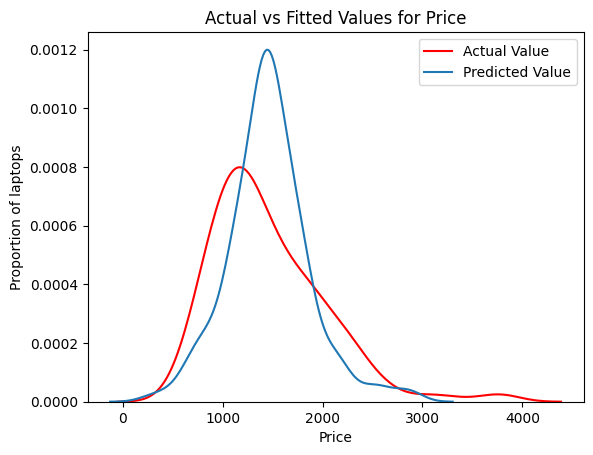

In [12]:
ax1 = sns.kdeplot(df['Price'], color="r", label="Actual Value")
sns.kdeplot(Yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?

In [13]:
mse_slr = mean_squared_error(Y, Yhat)
r2_score_slr = lm1.score(Z, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.5082509055187374
The mean square error of price and predicted value is:  161680.57263893107


### Task 3 - Polynomial Regression

Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit

In [14]:
X = df[["CPU_frequency"]]
X = X.to_numpy().flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

ValueError: Polynomial must be 1d only.